In [5]:
import cv2
import numpy as np

img = cv2.imread('images/lines.jpg')

w, h = img.shape[:2]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3),0)
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
edges = cv2.Canny(closing,50,150,apertureSize = 3)
minLineLength = 1
maxLineGap = 0
lines = cv2.HoughLinesP(edges, 2, np.pi/180, 2, minLineLength,maxLineGap)
img2 = img.copy()
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img2,(x1,y1),(x2,y2),(0,255,0),1)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('images/image1.jpg', img)
cv2.imwrite('images/image2.jpg', img2)

True

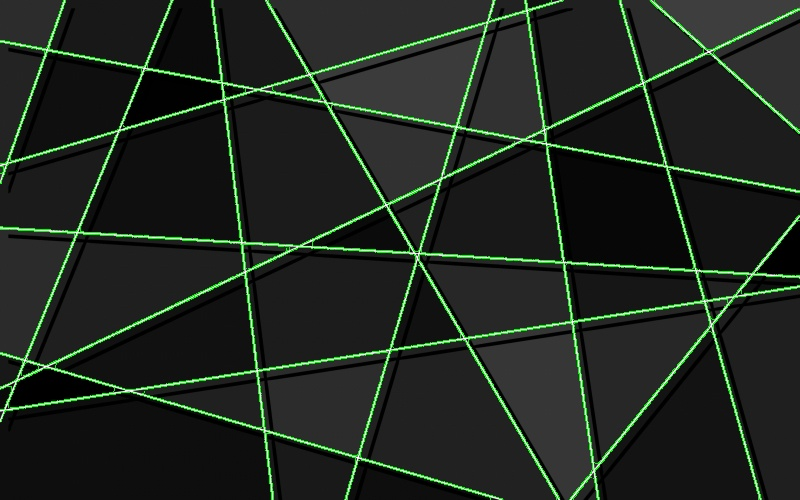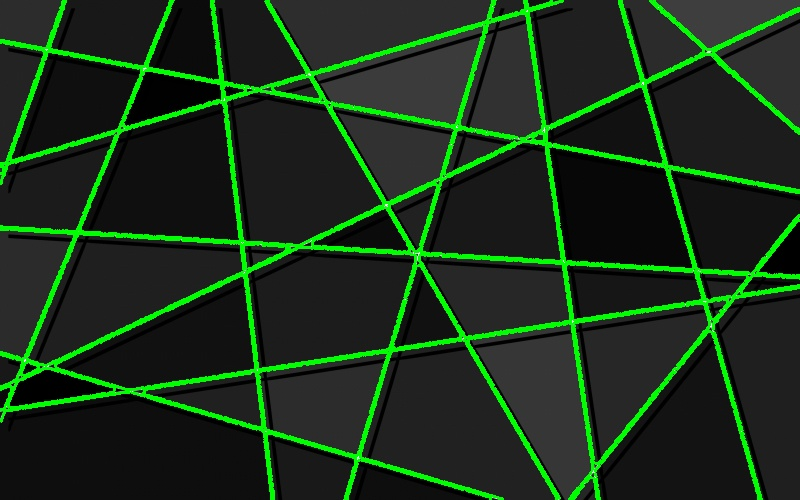

In [7]:
import cv2
import numpy as np

img = cv2.imread('images/skyskeb_one.jpg')
w, h = img.shape[:2]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3),0)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        if x1 == x2:
            cv2.line(img,(x1,0),(x2,h),(0,255,0),2)

cv2.imwrite('images/image3.jpg',img)

True

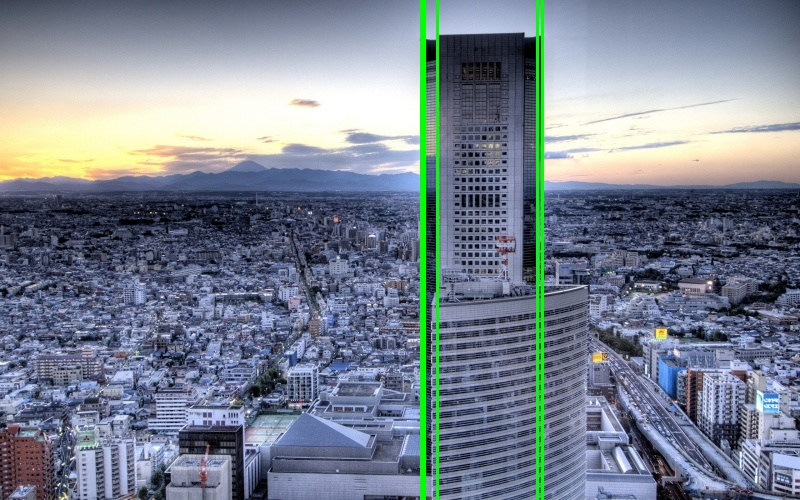

In [10]:
import cv2

img = cv2.imread('images/square_many2.jpg')
img2 = img.copy()
template = cv2.imread('images/green_square.jpg')
w, h = template.shape[:2]
methods = ['cv2.TM_SQDIFF_NORMED']
i = 0
for meth in methods:
    while i < 52:
        method = eval(meth)
        res = cv2.matchTemplate(img, template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(img, top_left, bottom_right, (0, 0, 0), 2)
        i += 1
cv2.putText(img, str(i), (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imwrite('images/image4.jpg',img)

True

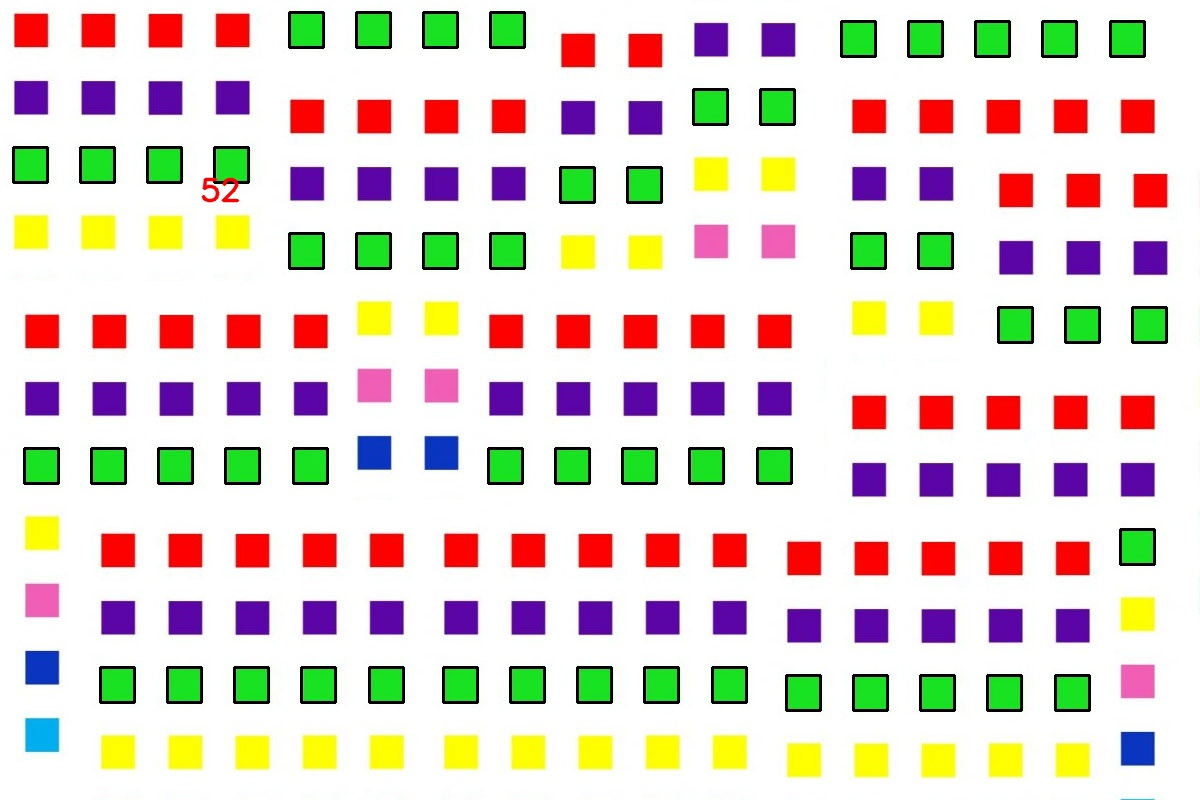